# Métodos Numéricos 2

### Professor João Paixão

### Livros:
 - Numerical Algorithms por Justin Solomon
 - Numerical Lingear Algebra por Trefethen

# Aula 1
## Problema

Temos dados sobre a votação de 85 senadores em 60 votações.
Isso constitui uma matriz 85x60, na qual cada linha representa um senador e cada coluna uma votação.
Cada célula possui um valor 1, 0 ou -1 dependendo de como o senador votou em determinada votação.

$$
    Senadores \bigg \{ 
    \overbrace{
    \begin{bmatrix}
          &   &  \\
          &   & 
    \end{bmatrix}
    }^\text{Votações}
$$

O objetivo é transformar essa matriz em uma ordenação entre os senadores e tentar tirar algum significado dessa representação 1D dos dados.

Inicialmente não é óbvio como devemos proceder, pensemos, então, em uma versão simplificada primeiro.

Esquecendo a semântica do problema, vamos nos concentrar no problema de traduzir uma lista de pontos com coordenadas reais em 2D para uma ordenação em uma linha.
Nesse caso, obteremos uma matriz Nx2.
Como estamos em 2D, podemos visualizá-la sem muita dificuldade.

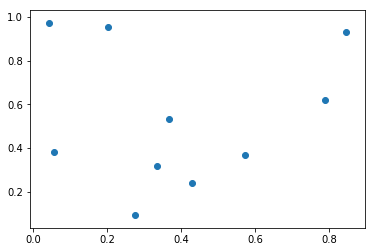

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Reduzimos a quantidade
N = 10

data = np.random.rand(N,2)

plt.scatter(data[:,0], data[:,1])
plt.show()

Uma ideia interessante é tratar um pouco os dados antes de começarmos a trabalhar com eles.

Podemos por exemplo, centralizá-los em torno da origem.

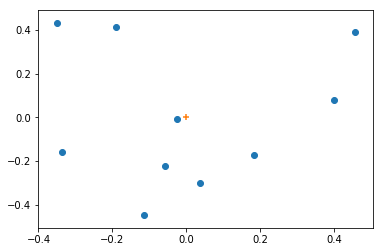

In [2]:
center = np.average(data, axis=0)

#Centered data
c_data = data - center

plt.scatter(c_data[:,0], c_data[:,1])

#Plotting the origin
plt.scatter([0], [0], marker="+")
plt.show()

Agora, com os dados centralizados em torno da origem, temos diversas maneiras de achar uma reta para usar como base para nossa ordenação.

Uma ideia imediata é usar a técnica de mínimos quadrados para gerar a reta.

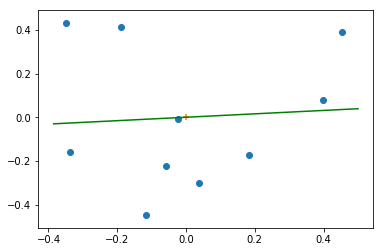

In [15]:
s = lambda x: np.sum((x[0] - np.average(x[0]))*(x[1] - np.average(x[1]))) / (x[0].shape[0] - 1)

angular_coef = s((c_data[:,0], c_data[:,1])) / s((c_data[:,0], c_data[:,0]))
linear_coef = np.average(c_data[:,1]) - angular_coef*np.average(c_data[:,0])
f_line = lambda x: x * angular_coef + linear_coef

line_x = np.linspace(np.min(c_data[:,0])*1.1, np.max(c_data[:,0])*1.1, 1000)
line_y = f_line(line_x)

#Plotting
plt.scatter(c_data[:,0], c_data[:,1])

#Plotting line
plt.plot(line_x, line_y, c="g")

#Plotting the origin
plt.scatter([0], [0], marker="+")

plt.show()

Podemos agora usar a projeção dos pontos nessa reta para criar a nossa ordenação.

Entretanto, talvez essa escolha para gerar a reta não seja tão adequada.
Afinal, quando usamos mínimos quadrados, estamos querendo minimizar o erro em apenas uma dimensão. Isso significa que estamos priorizando uma dimensão em relação às outras. No caso dos votos, estaríamos dizendo que uma votação tem uma importância maior para ordenação dos senadores do que as outras. Isso não é desejável, uma vez que queremos um modo de reduzir a dimensionalidade de qualquer tipo de dado desprovido de sentido semântico.

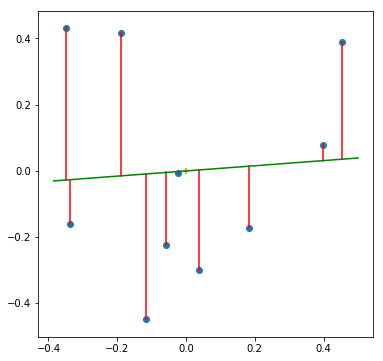

In [14]:
plt.figure(figsize=(6,6))
#Plotting errors
for point in c_data:
    plt.plot([point[0]]*2, [point[1], f_line(point[0])], c="r")

#Plotting
plt.scatter(c_data[:,0], c_data[:,1])

#Plotting line
plt.plot(line_x, line_y, c="g")

#Plotting the origin
plt.scatter([0], [0], marker="+")
    
plt.show()

Uma escolha mais interessante seria escolher a reta que minimiza as distâncias ortogonais à reta em vez de distâncias na direção de uma das dimensões.

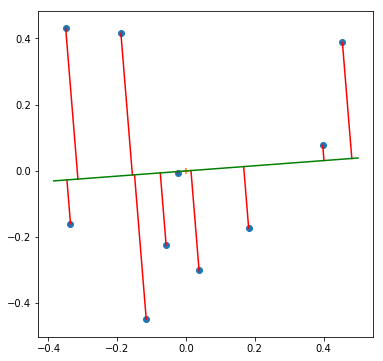

In [12]:
#Plotting orthogonal distance
line_dir = np.array([1, angular_coef])
line_dir /= np.linalg.norm(line_dir)

plt.figure(figsize=(6,6))
for point in c_data:
    end_point = point.T.dot(line_dir) * line_dir
    plt.plot([point[0], end_point[0]], [point[1], end_point[1]], c="r")
    
#Plotting

plt.scatter(c_data[:,0], c_data[:,1])

#Plotting line
plt.plot(line_x, line_y, c="g")

#Plotting the origin
plt.scatter([0], [0], marker="+")
    
plt.show()

Formalizando o problema então, ficamos com:

Dados os pontos  $a_1, a_2, a_3, ..., a_N$

Queremos encontrar um vetor unitário $v$ que minimize a soma das distâncias ortogonais dos pontos em relação à reta que ele descreve.

$$\min_{v} \sum_{i = 1}^{N}{\lVert d_i \rVert}$$

Podemos expandir essa expressão para deixar claro o que realmente queremos minimizar.

$$\min_{v} \sum_{i = 1}^{N}{\lVert a_i - ({a_i}^{T} v)v \rVert^2}$$

Manipulando um pouco a expressão, podemos chegar a um resultado mais limpo.

$$\min_{v} \sum_{i = 1}^{N}{\lVert a_i - ({a_i}^{T} v)v \rVert^2}$$

$$\min_{v} \sum_{i = 1}^{N}{(a_i - ({a_i}^{T} v)v)^T(a_i - ({a_i}^{T} v)v)}$$

$$\min_{v} \sum_{i = 1}^{N}{({a_i}^T - ({a_i}^{T} v)v^T)(a_i - ({a_i}^{T} v)v)}$$

$$\min_{v} \sum_{i = 1}^{N}{{a_i}^T a_i - 2({a_i}^T v)({a_i}^T v) + ({a_i}^T v)^2 v^T v}$$

$$\min_{v} \sum_{i = 1}^{N}{{a_i}^T a_i - ({a_i}^T v)^2 v^T v}$$

Usando o fato de $v$ ser unitário, podemos tirar a última parte da expressão

$$\min_{v} \sum_{i = 1}^{N}{{a_i}^T a_i - ({a_i}^T v)^2}$$

Como o termo ${a_i}^T a_i$ aparece em todas as parcelas e não depende de $v$, podemos eliminá-lo também

$$\min_{v} \sum_{i = 1}^{N}{- ({a_i}^T v)^2}$$

Finalmente, podemos tirar o sinal de negativo e transformar esse problema em um de maximização

$$\max_{v} \sum_{i = 1}^{N}{({a_i}^T v)^2}$$

Essa última forma também possui uma interpretação semântica interessante. Ela indica que o problema de minimizar as distâncias é equivalente ao de maximizar as projeções dos pontos na reta.

Podemos escrever esse resultado em notação matricial.

$$
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
  \max_{\substack{v \\ \norm{v} = 1}}
\norm{ \begin{bmatrix}
    {a_1}^Tv \\
    {a_2}^Tv \\
    \vdots \\
    {a_N}^Tv
    \end{bmatrix} }^2
$$
$$
    \max_{\substack{v \\ \norm{v} = 1}}
    \norm{
    \underbrace{
    \begin{bmatrix}
    {a_1}^T \\
    {a_2}^T \\
    \vdots \\
    {a_N}^T
    \end{bmatrix}
    }_\text{A}
    *
    \begin{bmatrix}
      \\
    v \\
      \\
    \end{bmatrix}}^2
$$
Ficamos então com o problema:
$$\max_{\substack{v \\ \norm{v} = 1}}\norm{Av}^2$$

Com isso, podemos definir uma função $f = \norm{Av}^2$.

Agora, tudo o que devemos fazer é maximizar $f$ de acordo com as restrições.

Mas como fazer isso?

Uma forma seria tirar o gradiente da função. Com essa informação conseguimos encontrar os pontos críticos, e escolher o que maximiza a função dentre eles.

### Cálculo em notação vetorial
Para facilitar o cálculo de gradientes em notação vetorial, vale a pena fazermos alguns exemplos mais simples antes.

Comecemos com uma função linear simples:
$$f(v) = c^Tv$$

Queremos agora calcular o gradiente $\nabla_v f$. Se expandirmos a expressão acima, fica mais fácil de enxergar o gradiente.

$$f(v) = c_1*v_1 + c_2*v_2 + c_3*v_3 + \cdots + c_n*v_n$$

$$
    \nabla_v f(v) = 
    \begin{bmatrix}
    \frac{\partial}{\partial v_1} (c_1*v_1 + c_2*v_2 + c_3*v_3 + \cdots + c_n*v_n) \\
    \frac{\partial}{\partial v_2} (c_1*v_1 + c_2*v_2 + c_3*v_3 + \cdots + c_n*v_n) \\
    \vdots \\ 
    \frac{\partial}{\partial v_n} (c_1*v_1 + c_2*v_2 + c_3*v_3 + \cdots + c_n*v_n) \\
    \end{bmatrix}
$$

$$
    \nabla_v f(v) = 
    \begin{bmatrix}
    c_1 \\
    c_2 \\
    \vdots \\ 
    c_n
    \end{bmatrix}
$$

$$
    \nabla_v f(v) = c
$$

Tomemos um exemplo um pouco mais complexo: uma expressão quadrática.

$$
   f(v) = v^TMv 
$$

Nesse exemplo, $M$ é uma matriz 2x2 arbitrária.

$$
    f(v) =
    \begin{bmatrix}
        v_1 & v_2
    \end{bmatrix}
    \begin{bmatrix}
        m_{11} & m_{12} \\
        m_{21} & m_{22}
    \end{bmatrix}
    \begin{bmatrix}
        v_1 \\ v_2
    \end{bmatrix}
$$

$$
    f(v) =
    \begin{bmatrix}
        v_1 m_{11} + v_2 m_{21} & v_1 m_{12} + v_2 m_{22}
    \end{bmatrix}
    \begin{bmatrix}
        v_1 \\ v_2
    \end{bmatrix}
$$

$$
    f(v) = (v_1 m_{11} + v_2 m_{21})v_1 + (v_1 m_{12} + v_2 m_{22})v_2 
    \\
    f(v) = v_1^2 m_{11} + v_1v_2 m_{21} + v_1 v_2 m_{12} + v_2^2 m_{22}
$$

Calculemos, agora, o gradiente.

$$
    \nabla_v f(v) =
    \begin{bmatrix}
        \frac{\partial}{\partial v_1} (v_1^2 m_{11} + v_1v_2 m_{21} + v_1 v_2 m_{12} + v_2^2 m_{22}) \\
        \frac{\partial}{\partial v_2} (v_1^2 m_{11} + v_1v_2 m_{21} + v_1 v_2 m_{12} + v_2^2 m_{22}) \\
    \end{bmatrix}
$$

$$
    \nabla_v f(v) =
    \begin{bmatrix}
        2 v_1 m_{11} + v_2 m_{21} + v_2 m_{12} \\
        v_1 m_{21} + v_1 m_{12} + 2 v_2 m_{22}
    \end{bmatrix}
$$

$$
    \nabla_v f(v) =     
    \begin{bmatrix}
        m_{11} + m_{11} & m_{21} + m_{12} \\
        m_{21} + m_{12} & m_{22} + m_{22} 
    \end{bmatrix}
    \begin{bmatrix}
        v_1 \\
        v_2
    \end{bmatrix}
$$

$$
    \nabla_v f(v) = (M + M^T)v
$$

Uma característica interessante de se notar é o fato de podermos simplificar o resultado caso a matriz em questão seja simétrica.

$$
    \nabla_v f(v) = 2Mv
$$

Voltemos ao problema.

Temos a nossa função $f = \norm{Av}^2$. Podemos expandir essa expressão

$$
    f = v^T A^T A v
$$

Usemos a ferramenta que desenvolvemos anteriormente para tirar o gradiente dessa função.

$$
    \nabla_v f = (A^TA + (A^TA)^T)v \\
    \nabla_v f = (A^TA + A^TA)v \\
    \nabla_v f = 2(A^TA)v
$$

Pronto. Basta igualarmos a expressão a zero, certo? Quase. Se simplesmente igualarmos a zero, não estaremos levando em consideração a restrição do problema: $\norm{v} = 1$.

Como resolver essa questão?